# Data Preprocessing

### Importing libraries and CSV file

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

'''
import cupy as cp
import cudf
%reload_ext cudf.pandas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)
'''

"\nimport cupy as cp\nimport cudf\n%reload_ext cudf.pandas\nimport matplotlib.pyplot as plt\n%matplotlib inline\nimport seaborn as sns\nimport pandas as pd\nimport warnings\nwarnings.filterwarnings('ignore')\npd.pandas.set_option('display.max_columns', None)\n"

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [3]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

# Data Cleaning

## Checking for Null Values

In [4]:
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]
for feature in features_with_nan:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Artist Reputation 11.53846 % missing values
Height 5.76923 % missing values
Width 8.98462 % missing values
Weight 9.03077 % missing values
Material 11.75385 % missing values
Transport 21.41538 % missing values
Remote Location 11.86154 % missing values


In [5]:
features_with_nan

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Material',
 'Transport',
 'Remote Location']

#### When considering the potential impact of the missing data on the Dataset, it is important to consider the underlying reasons for why the data are missing
### Missing data are of three categories:
#### Missing completely at random (MCAR)
#### Missing at random (MAR).
#### Missing not at random (MNAR).

## CHecking for duplicate values

In [6]:
df.duplicated().sum()

0

### Observation
#### There are no deplicated values in the data

# Separating Features

In [7]:
target_feature = 'Cost'
numeric_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
numeric_feature.remove(target_feature)
non_numeric_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('We have {} Numeric features:{}'.format(len(numeric_feature), numeric_feature))
print('We have {} Non numeric features:{}'.format(len(non_numeric_feature), non_numeric_feature))

We have 6 Numeric features:['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price']
We have 13 Non numeric features:['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


In [8]:
numeric_feature

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price']

## Imputing null values with median to check for multicollinearity

In [9]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [10]:
df1 = df.copy()
for i in numeric_feature:
    df1[i].fillna(df1[i].median(), inplace=True)

In [11]:
df1.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation           0
Height                      0
Width                       0
Weight                      0
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

## Multicollinearity Check

### Variance Inflation Factor

#### Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
#### Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [12]:
import statsmodels.api as sm
for i in range(0, len(numeric_feature)):
    x = df1[numeric_feature[i]]
    y = df1.Cost
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/(1-rsq), 2)
    print("Variance Inflation Factor of {} column is {} \n".format(numeric_feature[i], vif))

Variance Inflation Factor of Artist Reputation column is 1.01 

Variance Inflation Factor of Height column is 1.01 

Variance Inflation Factor of Width column is 1.02 

Variance Inflation Factor of Weight column is 1.2 

Variance Inflation Factor of Price Of Sculpture column is 1.3 

Variance Inflation Factor of Base Shipping Price column is 1.01 



### Observation
#### All columns have VIF around 1, hence there is no severe multicollinearity

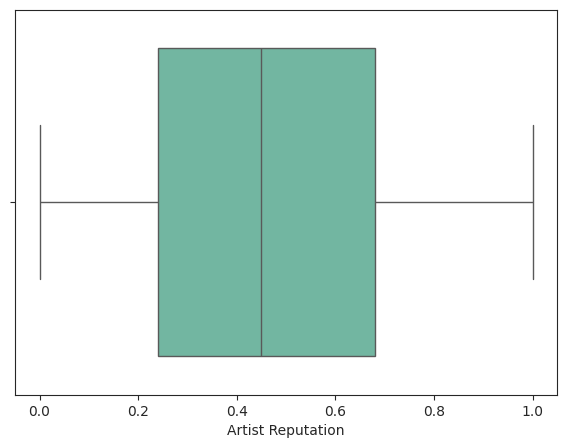

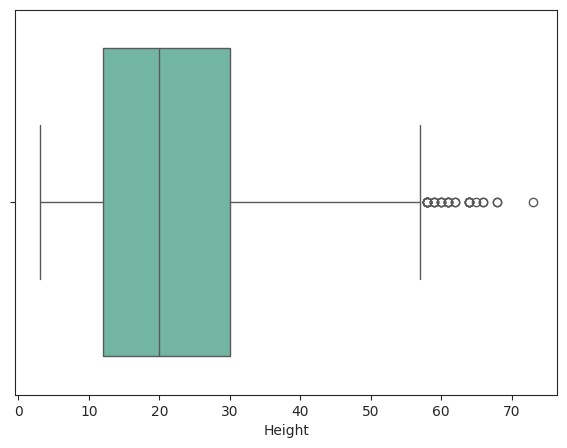

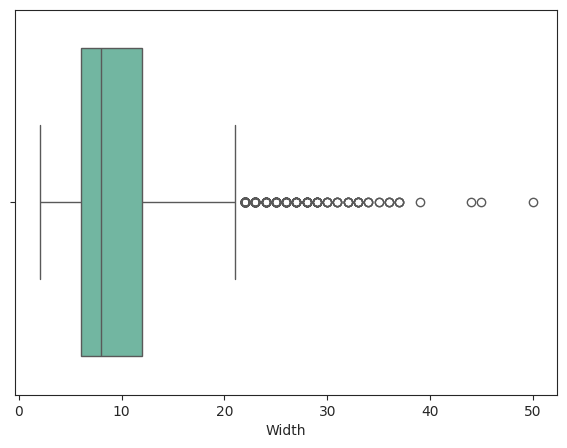

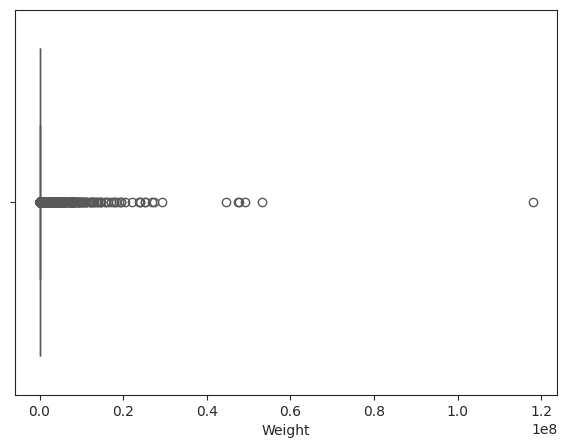

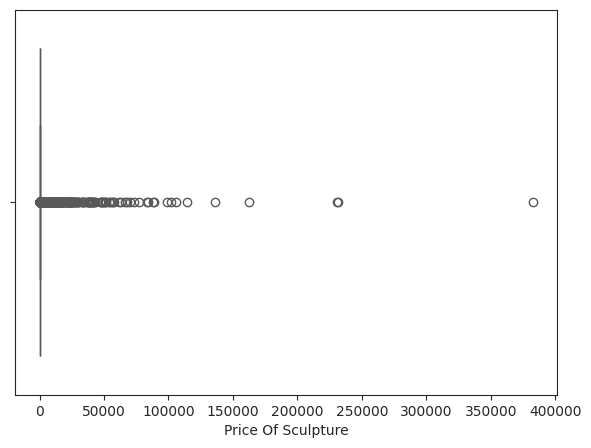

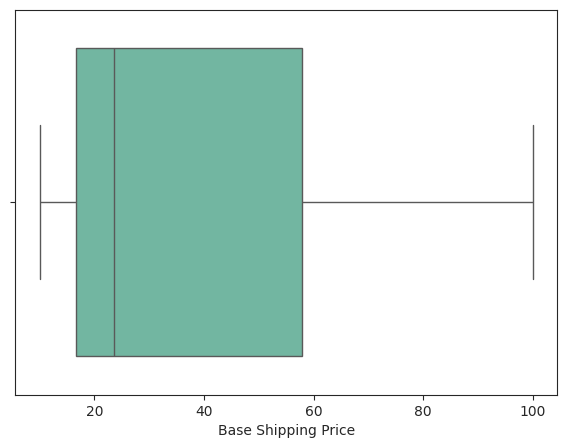

In [13]:
for i in numeric_feature:
    plt.figure(figsize=(7,5))
    sns.set_style('ticks')
    sns.boxplot(df[i], orient='h', palette='Set2')

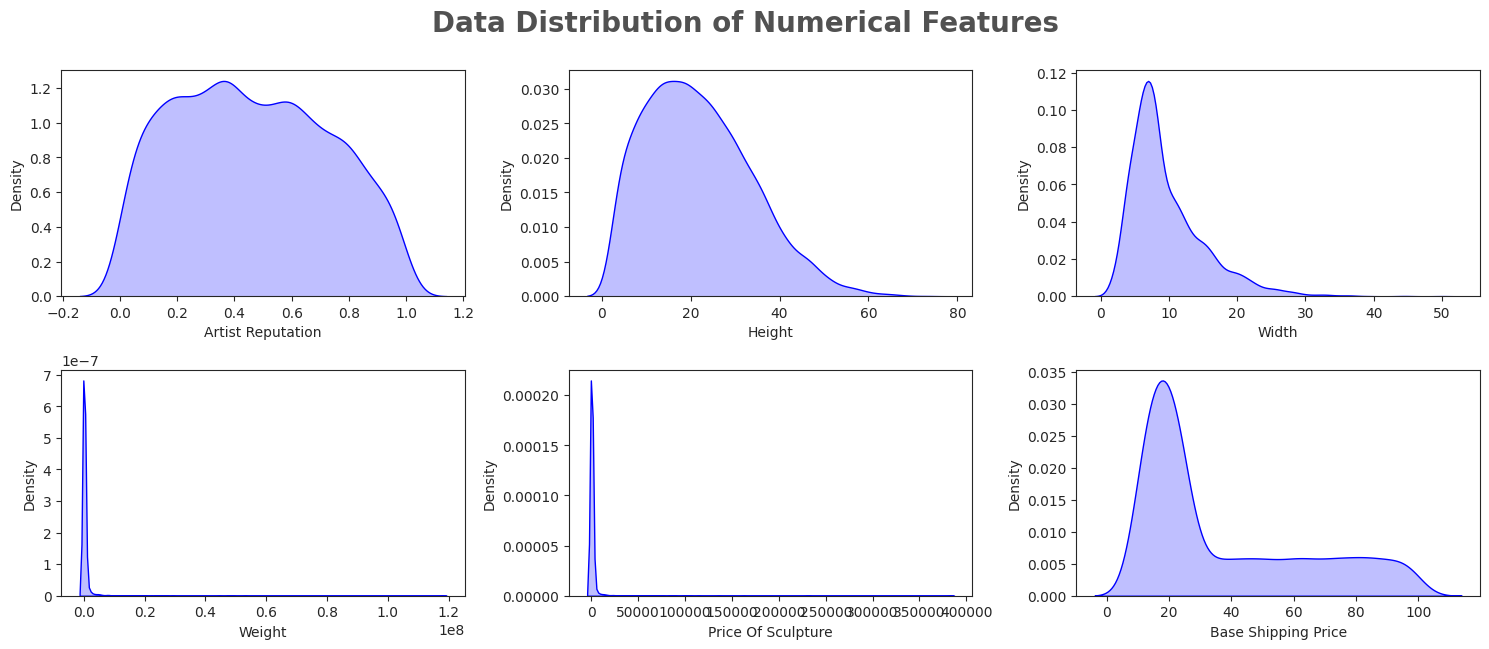

In [14]:
plt.figure(figsize=(15,15))
plt.suptitle('Data Distribution of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)
for i in range(0, len(numeric_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_feature[i]], shade=True, color='b')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

In [15]:
df[numeric_feature].skew()

Artist Reputation       0.141363
Height                  0.594041
Width                   1.546702
Weight                 21.556174
Price Of Sculpture     22.206823
Base Shipping Price     0.918102
dtype: float64

### Observation
#### 1) Weight and Price of Sculpture are extremely skewed, maybe because of Outlier.
#### 2) We can handle these case with power transformer or log transformer
#### 3) Width, Base Shipping Price is sligthy positively skewed but not severe as shown by skewness coefficient.

## Checking the Power Transformer on Outliers

In [16]:
df1.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation           0
Height                      0
Width                       0
Weight                      0
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [17]:
outlier_features = ['Weight', 'Price Of Sculpture']

In [18]:
outlier_data = df1[outlier_features]

In [19]:
outlier_features = ['Weight', 'Price Of Sculpture']
outlier_data = df1[outlier_features]
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')

df1[outlier_features] = pt.fit_transform(df1[outlier_features])
df_outlier = pd.DataFrame(outlier_data, columns=outlier_features)

In [20]:
df_outlier = pd.DataFrame(outlier_data, columns=outlier_features)

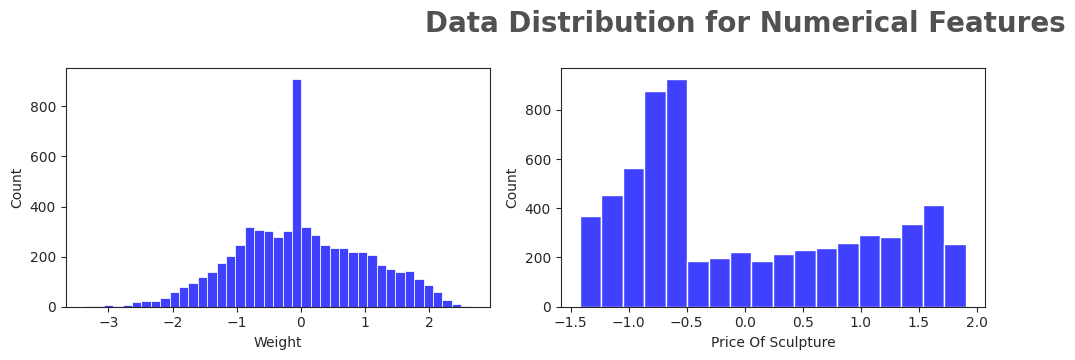

In [21]:

plt.figure(figsize=(15, 15))
plt.suptitle('Data Distribution for Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(outlier_features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df1[outlier_features[i]], color='b')
    plt.xlabel(outlier_features[i])
    plt.tight_layout()


In [22]:
df1[outlier_features].skew()

Weight                0.024918
Price Of Sculpture    0.438879
dtype: float64

### Observation
#### Power Transformer did a good job in overcome skewness and handling outliers

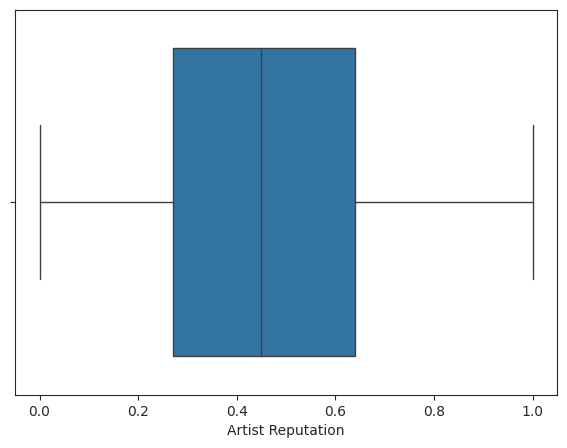

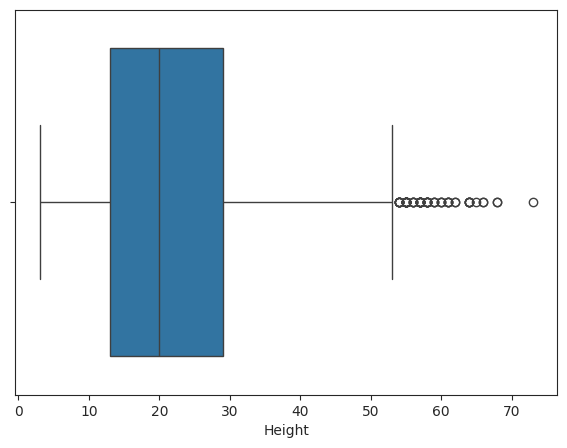

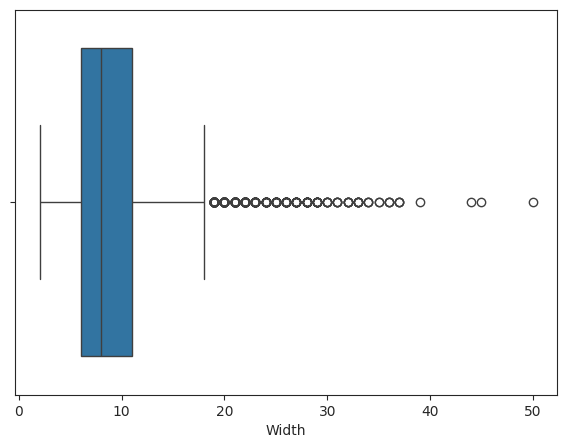

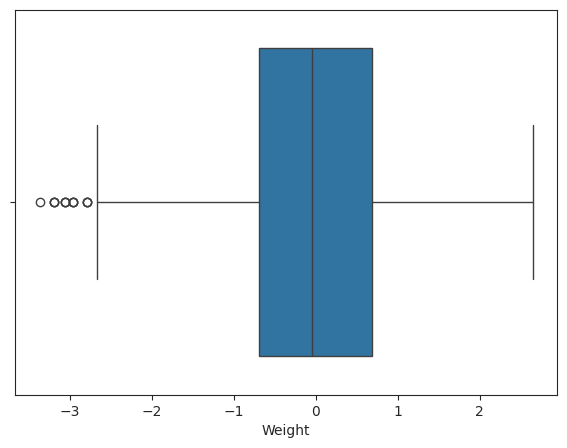

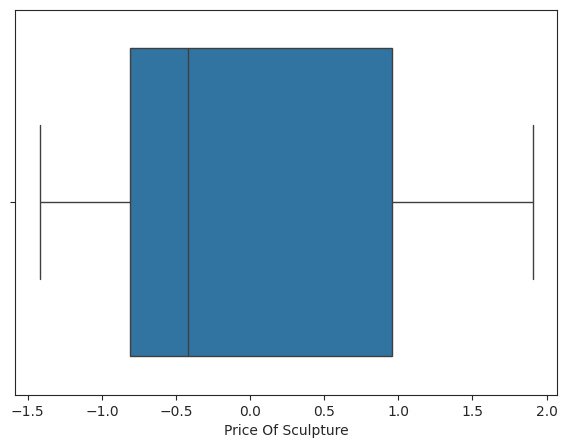

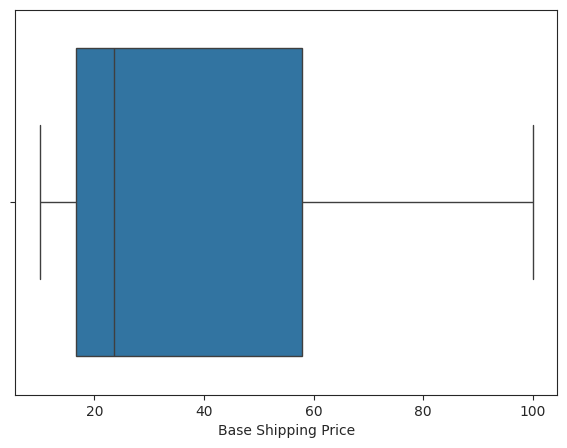

In [23]:
for i in numeric_feature:
    plt.figure(figsize=(7,5))
    sns.set_style('ticks')
    ax = sns.boxplot(df1[i], orient='h')

### Removing outliers from Target Column
#### Because most model would perform better on noiseless data, as Outlier might skew the findings of your model in one direction

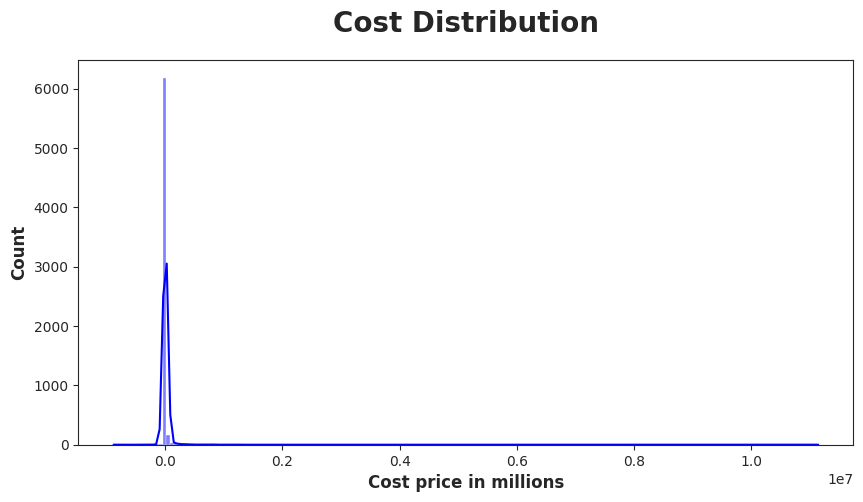

In [24]:

plt.subplots(figsize=(10,5))
sns.histplot(df['Cost'], bins=200, kde=True, color = 'b')
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.show()


In [25]:
df1['Cost'].skew()

29.817459343776964

In [26]:
df1['Cost'] = np.log1p(df1['Cost'])

In [27]:
df1['Cost'].skew()

1.7804525777227336

In [28]:
df1.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation           0
Height                      0
Width                       0
Weight                      0
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                      659
dtype: int64

(array([1973., 1985.,  954.,  461.,  223.,  127.,   64.,   32.,   16.,
           6.]),
 array([ 4.46671239,  5.64267721,  6.81864203,  7.99460685,  9.17057167,
        10.34653649, 11.5225013 , 12.69846612, 13.87443094, 15.05039576,
        16.22636058]),
 <BarContainer object of 10 artists>)

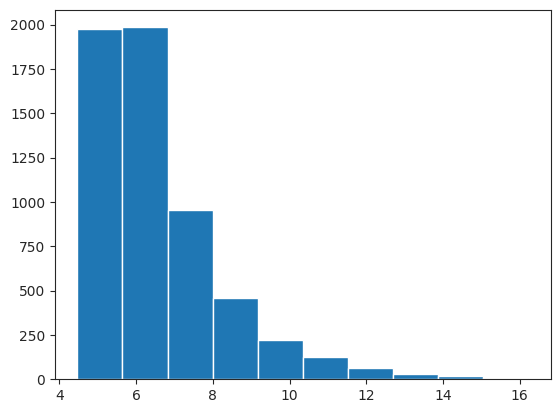

In [29]:
plt.hist(df1['Cost'])

### Observation
#### Data looks good after the log transformation but not Normally distributed.

### Feature Creation for Date Columns

In [30]:
# Convert object datatype to datetime
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

In [31]:
df['Month'] = pd.to_datetime(df['Scheduled Date']).dt.month
df['Year'] = pd.to_datetime(df['Scheduled Date']).dt.year

numeric_feature.append('Month')
numeric_feature.append('Year')

### Drop Unnecessary Column
#### Drop Customer Id, Artist Name and Customer Location columns having huge number of unique values.

#### Scheduled Date and Delivery Date can be dropped since the required features are extracted form it

In [32]:
to_drop_columns = ['Customer Id', 'Artist Name', 'Customer Location', 'Scheduled Date', 'Delivery Date']


In [33]:
df.drop(columns=to_drop_columns, inplace=True, axis=1)

In [34]:
df['Cost'].fillna(df['Cost'].median(), inplace=True)

In [35]:
df

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,Month,Year
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,-283.29,6,2015
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,-159.96,3,2017
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,-154.29,3,2015
3,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,-161.16,5,2015
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,-159.23,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,872.43,3,2018
6496,0.67,15.0,NaN,18981.0,NaN,67.18,27.72,No,No,No,Roadways,No,Working Class,No,1347.02,8,2015
6497,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,NaN,Yes,Wealthy,No,354.55,4,2019
6498,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,5037.50,3,2019


# Model Building

In [36]:
!pip install dask-ml dask-ml[complete] dask-ml[xgboost]

In [37]:
'''
!pip install \
--extra-index-url=https://pypi.nvidia.com \
dask-cudf-cu12==24.6.* \
cuml-cu12==24.6.*
'''

'\n!pip install --extra-index-url=https://pypi.nvidia.com dask-cudf-cu12==24.6.* cuml-cu12==24.6.*\n'

In [38]:
# !pip install catboost
# !pip install xgboost

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from cuml.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from cuml.ensemble import RandomForestRegressor
from cuml.svm import SVR
from cuml.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, KFold
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import dask_ml.model_selection as dcv

In [40]:
X=df.drop(columns=['Cost'], axis=1)
y = np.abs(df['Cost'])
y = np.log1p(y)

In [41]:
X = pd.DataFrame(X)
X

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Month,Year
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,6,2015
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,3,2017
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,3,2015
3,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,5,2015
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,3,2018
6496,0.67,15.0,NaN,18981.0,NaN,67.18,27.72,No,No,No,Roadways,No,Working Class,No,8,2015
6497,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,NaN,Yes,Wealthy,No,4,2019
6498,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,3,2019


# Train Test Split

In [42]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)
kf = KFold(n_splits=10, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [43]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
##print(y_train.shape, y_test.shape)

In [44]:
X_train

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Month,Year
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,6,2015
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,3,2017
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,3,2015
3,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,5,2015
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,3,2018
6496,0.67,15.0,NaN,18981.0,NaN,67.18,27.72,No,No,No,Roadways,No,Working Class,No,8,2015
6497,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,NaN,Yes,Wealthy,No,4,2019
6498,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,3,2019


## Feature Encoding and Scaling
### Selecting Numerical and Categorical features for feature SCaling

In [45]:
numeric_feature

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Month',
 'Year']

In [46]:
numeric_features = [feature for feature in numeric_feature if feature not in outlier_features]
Categorical_features = [feature for feature in non_numeric_feature if feature not in to_drop_columns]

(numeric_features), (Categorical_features), (outlier_features)

(['Artist Reputation',
  'Height',
  'Width',
  'Base Shipping Price',
  'Month',
  'Year'],
 ['Material',
  'International',
  'Express Shipment',
  'Installation Included',
  'Transport',
  'Fragile',
  'Customer Information',
  'Remote Location'],
 ['Weight', 'Price Of Sculpture'])

### Observation:
#### Mean imputer: Since we handeled outlier by powertransformer for the continuous features the mean and median of the features are nearly same. When there are no outliers mean performs an a better imputer.
#### Standardscaler: As the features distribution are nearly normal we use standard scaler.
#### Power Transformer: Since avg_glucose_level are skewed we use Power Transformer on them

## Making Pipeline for Feature Scaling

In [47]:
numeric_feature_pipeline = Pipeline(
    steps= [
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', RobustScaler())
    ]
)

categorical_feature_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('one_hot_encoder', OneHotEncoder(drop='first'))
    ]
)

outlier_feature_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('transformer', PowerTransformer(method='box-cox', standardize=True))
    ]
)

preprocessor = ColumnTransformer(
    [
        ('Numeric Pipeline', numeric_feature_pipeline, numeric_features),
        ('Categorical Pipeline', categorical_feature_pipeline, Categorical_features),
        ('Outliers Feature Pipeline', outlier_feature_pipeline, outlier_features)
    ]
)

In [48]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

In [49]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Model Selection
#### Here should understand the Various Classification models with default values from these models we can choose top 4 with Highest Accuracy score and proceed with HyperParameter Tuning

In [50]:
# functions which takes true and predicted values to calculate metrics
def evaluate_reg(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_Score = r2_score(true, predicted)
    return mae, mse, rmse, r2_Score

In [51]:
# function which can evaluate models and return a report
def evaluate_models(X_train, X_test, y_train, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''

    models_list = []
    r2_list = []

    for i in range(0, len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)

        # Make Predictions
        y_train_predict = model.predict(X_train)
        y_test_predict = model.predict(X_test)

        # Evaluate train and test datasets
        model_train_mae, model_train_mse, model_train_rmse, model_train_r2Score = evaluate_reg(y_train, y_train_predict)
        model_test_mae, model_test_mse, model_test_rmse, model_test_r2Score = evaluate_reg(y_test, y_test_predict)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model Performance for Training Set')
        print("Mean Absolute Error: {:.4f}".format(model_train_mae))
        print('Mean Squared Error: {:.4f}'.format(model_train_mse))
        print('Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
        print('r2 Score: {:.4f}'.format(model_train_r2Score))

        print('Model Performance for Test Set')
        print("Mean Absolute Error: {:.4f}".format(model_test_mae))
        print('Mean Squared Error: {:.4f}'.format(model_test_mse))
        print('Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
        print('r2 Score: {:.4f}'.format(model_test_r2Score))
        r2_list.append(model_test_r2Score)

        print('='*35)
        print('\n')

    report = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name','r2_Score']).sort_values(by=['r2_Score'], ascending=False)

    return report


In [52]:
# Initializing Models
models = {
    'Linear Regression': LinearRegression(),
    'K-Neighbour Regression': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(verbose=False, max_depth=5),
    'Adaboost Regressor': AdaBoostRegressor(),
    'SVR': SVR()
}

In [53]:
base_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Linear Regression
Model Performance for Training Set
Mean Absolute Error: 0.4959
Mean Squared Error: 0.5281
Root Mean Squared Error: 0.7267
r2 Score: 0.8066
Model Performance for Test Set
Mean Absolute Error: 0.5537
Mean Squared Error: 0.6136
Root Mean Squared Error: 0.7833
r2 Score: 0.7701


K-Neighbour Regression
Model Performance for Training Set
Mean Absolute Error: 0.3318
Mean Squared Error: 0.2775
Root Mean Squared Error: 0.5267
r2 Score: 0.8984
Model Performance for Test Set
Mean Absolute Error: 0.3951
Mean Squared Error: 0.3937
Root Mean Squared Error: 0.6274
r2 Score: 0.8525


Random Forest Regressor
Model Performance for Training Set
Mean Absolute Error: 0.2277
Mean Squared Error: 0.0892
Root Mean Squared Error: 0.2987
r2 Score: 0.9673
Model Performance for Test Set
Mean Absolute Error: 0.5274
Mean Squared Error: 0.5118
Root Mean Squared Error: 0.7154
r2 Score: 0.8083


Decision Tree
Model Performance for Training Set
Mean Absolute Error: 0.0000
Mean Squared Error: 0.0000
Roo

In [54]:
base_report

,Model Name,r2_Score
7,SVR,0.891741
4,XGBRegressor,0.888865
5,CatBoost Regressor,0.873191
1,K-Neighbour Regression,0.852529
2,Random Forest Regressor,0.808278
3,Decision Tree,0.805902
0,Linear Regression,0.770130
6,Adaboost Regressor,0.766984


## Initializing few parameters for hyperparameter tuning

In [55]:
svr_params = {
    'C': [1, 10, 12, 14, 16, 18, 20, 22],
    'gamma': [0.001, 0.01, 0.1, 1, 2, 5],
    'epsilon': [0.001, 0.01, 0.1, 1, 2, 4],
    'kernel': ("rbf", "poly", "sigmoid")
    }
cat_params = {
    'learning_rate': [0.03, 0.06],
    'depth':[3, 6, 9],
    'l2_leaf_reg': [2, 3, 4],
    'boosting_type': ['Ordered', 'Plain']
}
rf_params = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [56]:
# Model list for hyperparameter tuning
randomsearch_model = [
    ('RandomForestRegressor', RandomForestRegressor(), rf_params),
    ('SVR', SVR(), svr_params),
    ('Catboost', CatBoostRegressor(), cat_params)
]

In [57]:
model_param = {}
for name, model, params in randomsearch_model:
    random = dcv.RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f'--------- Best Params for {model_name} ---------')
    print(model_param[model_name])

Streaming output truncated to the last 5000 lines.
682:	learn: 0.3351835	total: 3.35s	remaining: 1.55s
683:	learn: 0.3346974	total: 3.35s	remaining: 1.55s
684:	learn: 0.3346486	total: 3.36s	remaining: 1.54s
685:	learn: 0.3345297	total: 3.36s	remaining: 1.54s
686:	learn: 0.3344191	total: 3.37s	remaining: 1.53s
687:	learn: 0.3342382	total: 3.38s	remaining: 1.53s
688:	learn: 0.3341595	total: 3.38s	remaining: 1.53s
689:	learn: 0.3341526	total: 3.38s	remaining: 1.52s
690:	learn: 0.3340782	total: 3.39s	remaining: 1.51s
691:	learn: 0.3340682	total: 3.39s	remaining: 1.51s
692:	learn: 0.3340052	total: 3.39s	remaining: 1.5s
693:	learn: 0.3336378	total: 3.4s	remaining: 1.5s
694:	learn: 0.3333037	total: 3.4s	remaining: 1.49s
695:	learn: 0.3332288	total: 3.4s	remaining: 1.49s
696:	learn: 0.3331704	total: 3.4s	remaining: 1.48s
697:	learn: 0.3331353	total: 3.41s	remaining: 1.47s
698:	learn: 0.3330733	total: 3.41s	remaining: 1.47s
699:	learn: 0.3327249	total: 3.41s	remaining: 1.46s
700:	learn: 0.33253

## reInitialize models with best parameters

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
models = {
    'Random Forest Regressor': RandomForestRegressor(**model_param['RandomForestRegressor'], n_jobs=-1),
    'Catboost': CatBoostRegressor(**model_param['Catboost'], verbose=False),
    'SVR': SVR(**model_param['SVR'], verbose=False)
}

In [60]:
retrained_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Random Forest Regressor
Model Performance for Training Set
Mean Absolute Error: 0.7013
Mean Squared Error: 0.9982
Root Mean Squared Error: 0.9991
r2 Score: 0.6344
Model Performance for Test Set
Mean Absolute Error: 0.7147
Mean Squared Error: 1.0436
Root Mean Squared Error: 1.0216
r2 Score: 0.6091


Catboost
Model Performance for Training Set
Mean Absolute Error: 0.1007
Mean Squared Error: 0.0245
Root Mean Squared Error: 0.1564
r2 Score: 0.9910
Model Performance for Test Set
Mean Absolute Error: 0.3465
Mean Squared Error: 0.3410
Root Mean Squared Error: 0.5840
r2 Score: 0.8723


SVR
Model Performance for Training Set
Mean Absolute Error: 0.1387
Mean Squared Error: 0.1136
Root Mean Squared Error: 0.3370
r2 Score: 0.9584
Model Performance for Test Set
Mean Absolute Error: 0.3075
Mean Squared Error: 0.2803
Root Mean Squared Error: 0.5295
r2 Score: 0.8950




In [61]:
retrained_report

,Model Name,r2_Score
2,SVR,0.894988
1,Catboost,0.872250
0,Random Forest Regressor,0.609055


### Best Model is SVR with r2 score of 0.895